In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gavote.csv')

In [ ]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  159 non-null    object 
 1   equip       159 non-null    object 
 2   econ        159 non-null    object 
 3   perAA       159 non-null    float64
 4   rural       159 non-null    object 
 5   atlanta     159 non-null    object 
 6   gore        159 non-null    int64  
 7   bush        159 non-null    int64  
 8   other       159 non-null    int64  
 9   votes       159 non-null    int64  
 10  ballots     159 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ KB


(            perAA           gore           bush        other          votes  \
 count  159.000000     159.000000     159.000000   159.000000     159.000000   
 mean     0.242981    7020.314465    8929.056604   381.654088   16331.025157   
 std      0.163082   19317.779818   18029.959822  1150.974980   36623.274439   
 min      0.000000     249.000000     271.000000     5.000000     832.000000   
 25%      0.111500    1385.500000    1803.500000    30.000000    3506.500000   
 50%      0.233000    2326.000000    3597.000000    86.000000    6299.000000   
 75%      0.348000    4430.000000    7468.500000   210.000000   11846.500000   
 max      0.765000  154509.000000  140494.000000  7920.000000  263211.000000   
 
              ballots  
 count     159.000000  
 mean    16926.503145  
 std     37865.152282  
 min       881.000000  
 25%      3693.500000  
 50%      6712.000000  
 75%     12251.000000  
 max    280975.000000  ,
 None)

In [ ]:
df.shape

(159, 11)

##Data Vizualization

In [ ]:
df.head()

,Unnamed: 0,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
0,APPLING,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
1,ATKINSON,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
2,BACON,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
3,BAKER,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
4,BALDWIN,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


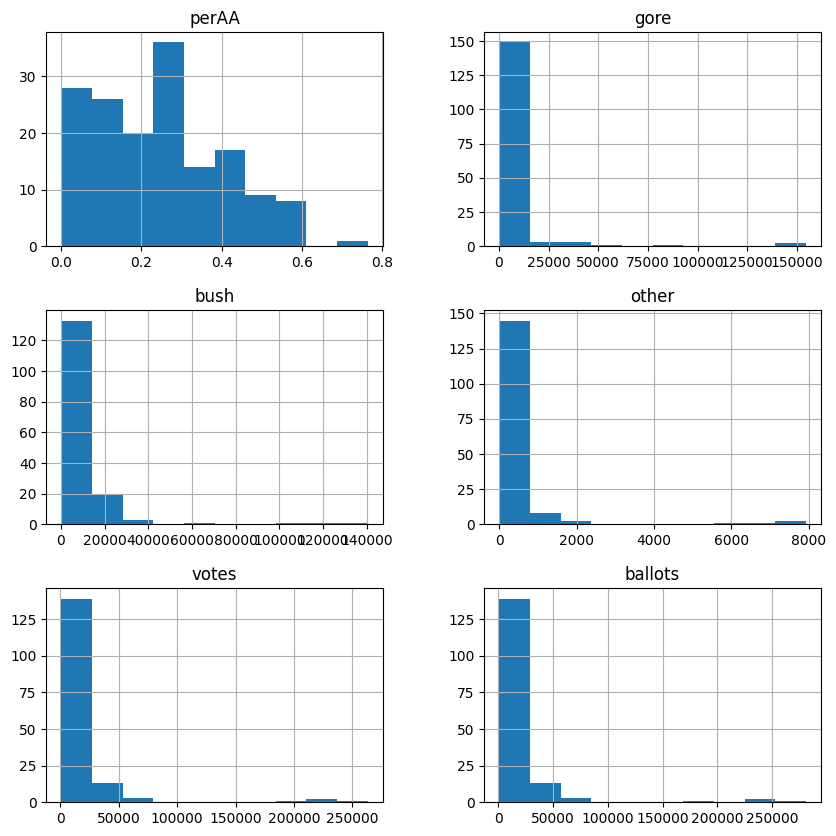

In [ ]:
df.hist(figsize=(10,10))
plt.show()

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [ ]:
df.head()

,equip,econ,perAA,rural,atlanta,gore,bush,other,votes,ballots
0,LEVER,poor,0.182,rural,notAtlanta,2093,3940,66,6099,6617
1,LEVER,poor,0.230,rural,notAtlanta,821,1228,22,2071,2149
2,LEVER,poor,0.131,rural,notAtlanta,956,2010,29,2995,3347
3,OS-CC,poor,0.476,rural,notAtlanta,893,615,11,1519,1607
4,LEVER,middle,0.359,rural,notAtlanta,5893,6041,192,12126,12785


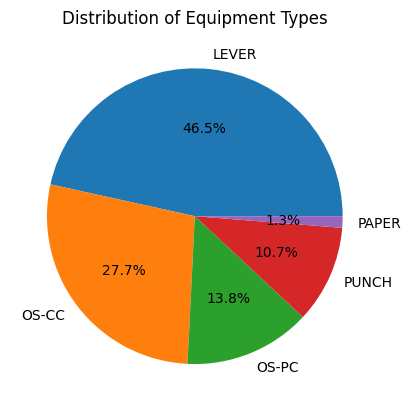

In [ ]:
equip_counts = df['equip'].value_counts()
plt.pie(equip_counts, labels=equip_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Equipment Types')
plt.show()

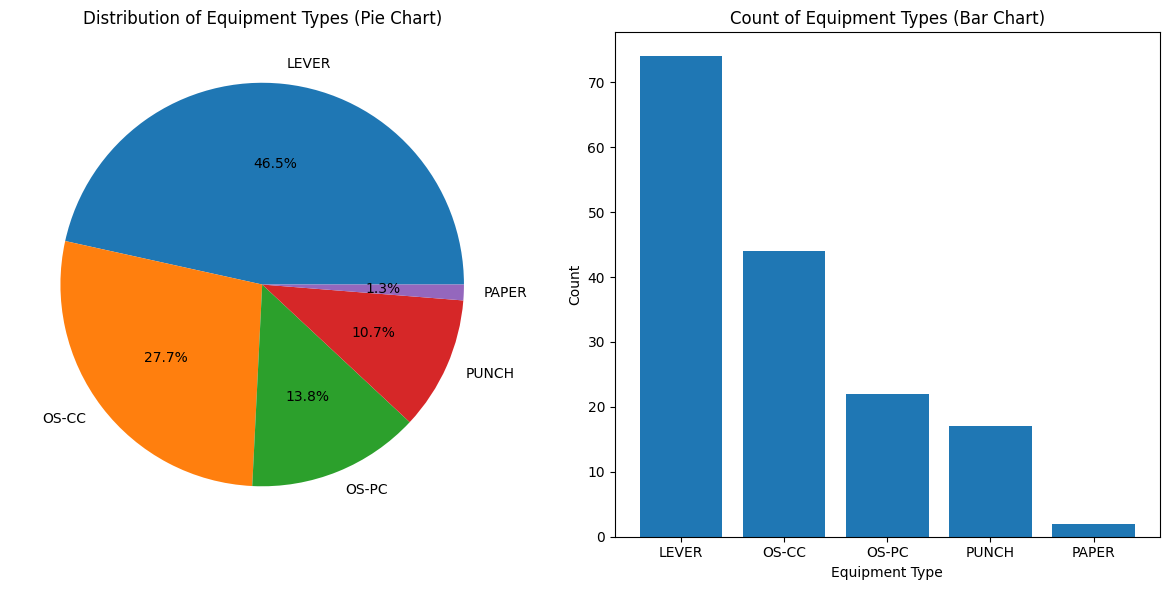

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Plot 1 ( pie chart)
axes[0].pie(equip_counts, labels=equip_counts.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Equipment Types (Pie Chart)')

# Plot 2 (bar chart)
axes[1].bar(equip_counts.index, equip_counts.values)
axes[1].set_xlabel('Equipment Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Equipment Types (Bar Chart)')

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
under_counts = df['ballots'] - df['votes']

norm_under_counts = under_counts/df['ballots']
norm_under_counts

,0
0,0.078283
1,0.036296
2,0.105169
3,0.054760
4,0.051545
...,...
154,0.023141
155,0.026749
156,0.026596
157,0.013713


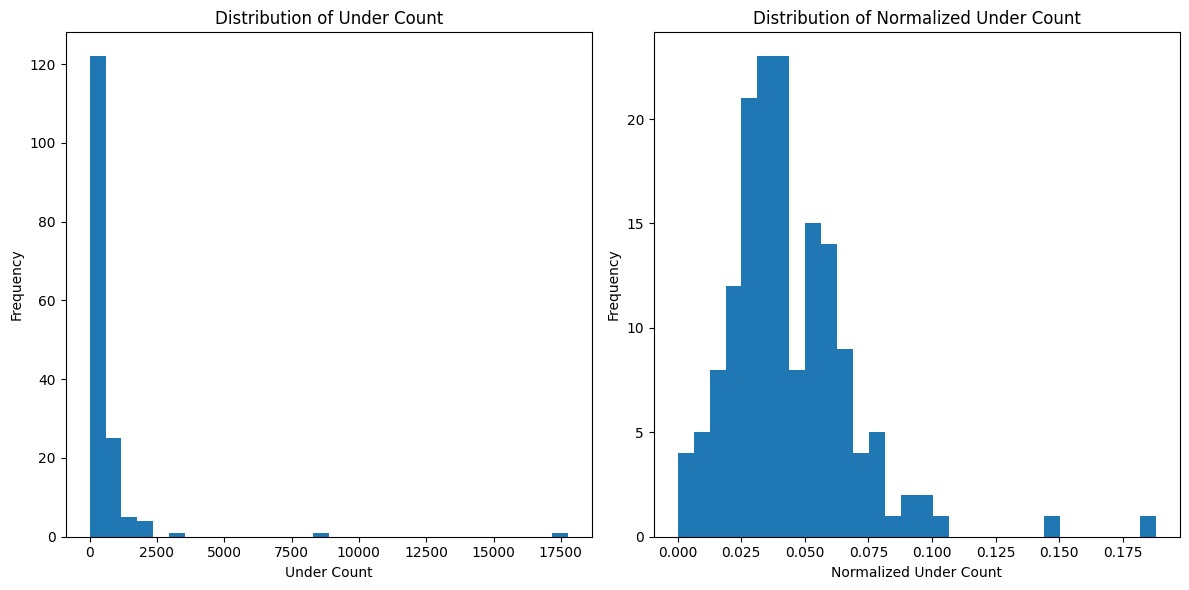

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns

# Plot 1
axes[0].hist(under_counts.values,bins=30) # Pass the values as data
axes[0].set_xlabel('Under Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Under Count')

# Plot 2
axes[1].hist(norm_under_counts.values,bins=30) # Pass the values as data
axes[1].set_xlabel('Normalized Under Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Normalized Under Count')

plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

<Axes: >

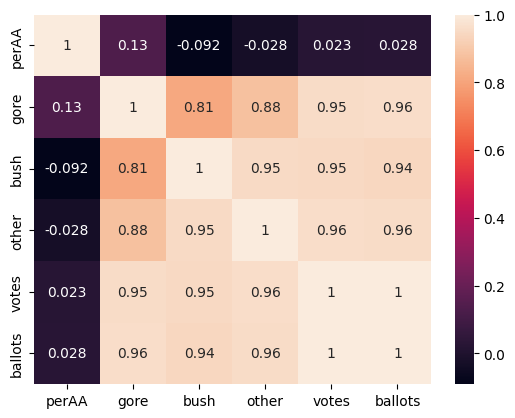

In [ ]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

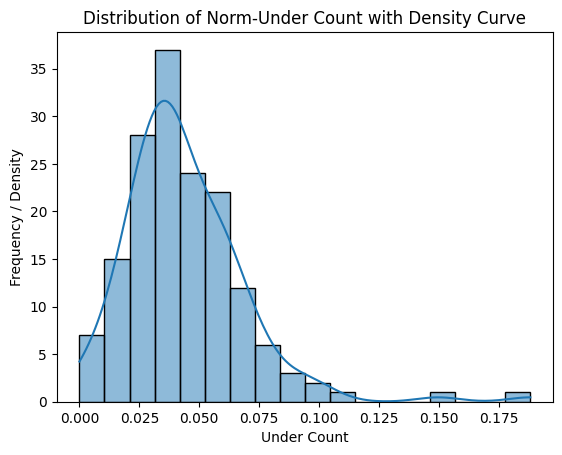

In [ ]:
sns.histplot(data=df, x=norm_under_counts, kde=True, bins='auto')
plt.xlabel('Under Count')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Norm-Under Count with Density Curve')
plt.show()

Text(0.5, 1.0, 'Box Plot of Under-counts by Equipment')

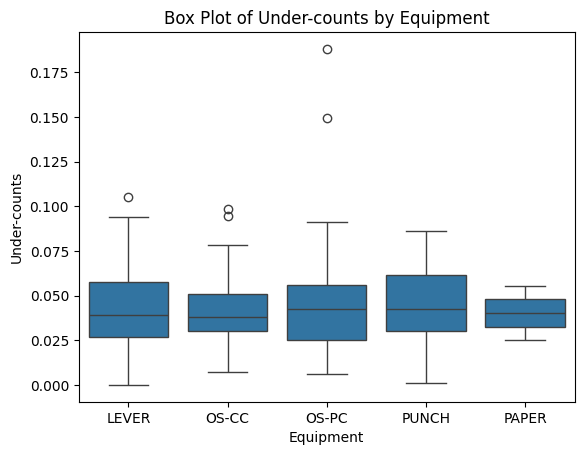

In [ ]:
sns.boxplot(data=df, x='equip', y=norm_under_counts.values)
plt.xlabel('Equipment')
plt.ylabel('Under-counts')
plt.title('Box Plot of Under-counts by Equipment')

In [ ]:
norm_under_counts.median()

0.03983313147624815

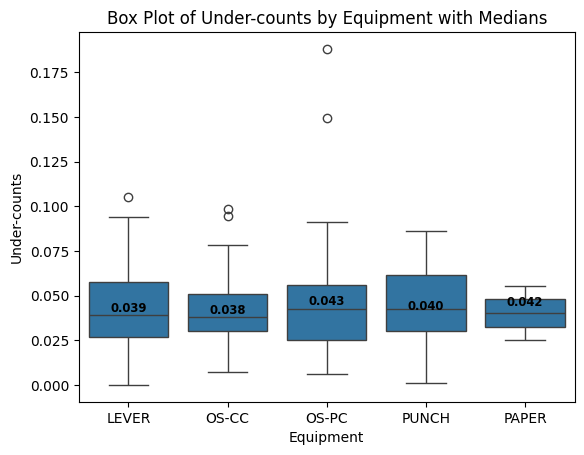

In [ ]:
# Add under_counts and norm_under_counts as columns to the DataFrame if they don't exist
if 'under_counts' not in df.columns:
    df['under_counts'] = df['ballots'] - df['votes']
if 'norm_under_counts' not in df.columns:
    df['norm_under_counts'] = norm_under_counts

# Create the boxplot
ax = sns.boxplot(data=df, x='equip', y='norm_under_counts')
plt.xlabel('Equipment')
plt.ylabel('Under-counts')
plt.title('Box Plot of Under-counts by Equipment with Medians')

# Calculate medians for each equipment type
medians = df.groupby('equip')['norm_under_counts'].median()
vertical_offset = df['norm_under_counts'].median() * 0.05 # Adjust as needed for label placement

# Display medians on the plot
for xtick in ax.get_xticks():
    equip_type = medians.index[xtick]
    label = medians.loc[equip_type]
    ax.text(xtick, label + vertical_offset, f'{label:.3f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


X = df.drop(['under_counts'], axis=1, errors='ignore')

# Perform one-hot encoding on categorical columns and update X
X = pd.get_dummies(X, columns=['equip', 'econ', 'rural', 'atlanta'], drop_first=True)

# Convert boolean columns to integers
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add  (intercept) to the model
X_with_const = add_constant(X, has_constant='add')


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]


print(vif_data)

               Feature          VIF
0                const    46.720120
1                perAA     1.879174
2                 gore          inf
3                 bush          inf
4                other          inf
5                votes          inf
6              ballots  4652.978272
7    norm_under_counts     1.589964
8          equip_OS-CC     1.374186
9          equip_OS-PC     1.538096
10         equip_PAPER     1.032554
11         equip_PUNCH     1.476723
12           econ_poor     2.098935
13           econ_rich     2.373392
14         rural_urban     1.732306
15  atlanta_notAtlanta     2.849658


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
scaler = StandardScaler()
df1 = pd.get_dummies(df, columns=['equip','econ','rural','atlanta'])
X=df1.drop(['under_counts','gore','bush','other','votes','ballots'],axis=1)
#X = df1[['equip_LEVER', 'equip_OS-CC', 'equip_OS-PC', 'equip_PAPER', 'equip_PUNCH', 'econ_middle', 'econ_poor', 'econ_rich', 'rural_rural', 'rural_urban', 'atlanta_Atlanta', 'atlanta_notAtlanta']]
y = df1['under_counts']
X= scaler.fit_transform(X)  # Scale X
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()  # Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:

lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_,lr.intercept_

(array([ 0.23321877,  0.16722327, -0.03595731, -0.07034076, -0.05721762,
        -0.01850572,  0.23048947,  0.22193054, -0.09047918, -0.20500585,
        -0.05196068,  0.05196068,  0.27613822, -0.27613822]),
 np.float64(0.034080638671319184))

In [ ]:
lr.predict(X_test)

array([ 0.26157856, -0.55965168, -0.09867143,  0.64988211,  0.05860763,
       -0.0247723 , -0.45964445, -0.71537177, -0.20330279,  0.72105728,
       -0.15858666, -0.35810206, -0.00492212, -0.26074449,  0.30476317,
        3.38614117, -0.10619065,  0.00860157, -0.23686554, -0.18481756,
       -0.17825774,  1.08386836, -0.59714221, -0.95359268,  0.09706521,
        0.25308118,  0.18803588, -0.18131744, -0.03116203, -0.23618042,
        0.25343784, -0.09293012])

In [ ]:
mean_squared_error(y_test,lr.predict(X_test))

0.3995953138775613

In [ ]:
r2_score(y_train,lr.predict(X_train))

0.43001706375249016

In [ ]:
df1.head()

,perAA,gore,bush,other,votes,ballots,under_counts,norm_under_counts,equip_LEVER,equip_OS-CC,equip_OS-PC,equip_PAPER,equip_PUNCH,econ_middle,econ_poor,econ_rich,rural_rural,rural_urban,atlanta_Atlanta,atlanta_notAtlanta
0,0.182,2093,3940,66,6099,6617,518,0.078283,True,False,False,False,False,False,True,False,True,False,False,True
1,0.230,821,1228,22,2071,2149,78,0.036296,True,False,False,False,False,False,True,False,True,False,False,True
2,0.131,956,2010,29,2995,3347,352,0.105169,True,False,False,False,False,False,True,False,True,False,False,True
3,0.476,893,615,11,1519,1607,88,0.054760,False,True,False,False,False,False,True,False,True,False,False,True
4,0.359,5893,6041,192,12126,12785,659,0.051545,True,False,False,False,False,True,False,False,True,False,False,True


In [ ]:
# Get the coefficients from the fitted model
feature_names = df1.drop(['under_counts','gore','bush','other','votes','ballots'],axis=1).columns # Use original DataFrame columns
coefficients = lr.coef_

# Create a pandas Series to associate feature names with coefficients
feature_importance = pd.Series(abs(coefficients), index=feature_names)

# Sort the feature importance in descending order
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Display the sorted feature importance
print("Feature Importance (Absolute Coefficients):")
display(sorted_feature_importance)

Feature Importance (Absolute Coefficients):


,0
atlanta_Atlanta,0.276138
atlanta_notAtlanta,0.276138
perAA,0.233219
equip_PUNCH,0.230489
econ_middle,0.221931
econ_rich,0.205006
norm_under_counts,0.167223
econ_poor,0.090479
equip_OS-CC,0.070341
equip_OS-PC,0.057218


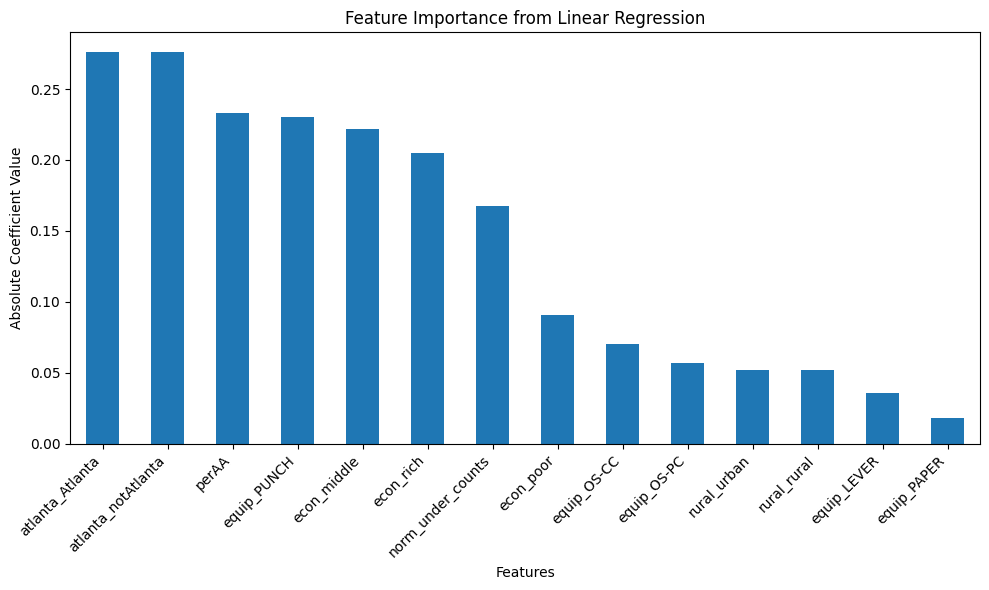

In [ ]:
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
model = LinearRegression()
#Forward selection
def forward_selection(X_train, y_train, model):
    remaining_features = list(X_train.columns)  # List of all feature names
    selected_features = []  # Start with no features selected
    best_score = -np.inf  # Initialize best score to a very low value

    # Loop until no more features improve the model
    while remaining_features:
        scores_with_candidates = []

        # Test adding each feature from the remaining set
        for feature in remaining_features:
            # Create a new set of features by adding the candidate feature
            X_train_subset = X_train[selected_features + [feature]]

            # Evaluate the model performance using cross-validation with R² score
            score = cross_val_score(model, X_train_subset, y_train, cv=5, scoring='r2')
            mean_score = np.mean(score)  # Higher score is better

            # Store the result with the feature being tested
            scores_with_candidates.append((mean_score, feature))

        # Sort by R² score (highest first)
        scores_with_candidates.sort(reverse=True, key=lambda x: x[0])

        # Get the best feature and score
        best_new_score, best_feature = scores_with_candidates[0]

        # If adding this feature improves the score, include it in the model
        if best_new_score > best_score:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_score = best_new_score
        else:
            break  # No improvement, stop the process

    return selected_features, best_score
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=feature_names)
else:
    X_train_df = X_train
# Run forward selection using the DataFrame with column names
best_features, best_r2_score = forward_selection(X_train_df, y_train, model)

# Display the selected features and the best R² score
print(f"Selected features using Forward Selection: {best_features}")
print(f"Best R² score achieved: {best_r2_score}")

Selected features using Forward Selection: ['econ_poor']
Best R² score achieved: -0.281064473938967


In [ ]:
import statsmodels.api as sm

# Backward Elimination
def backward_elimination(X_train, y_train, model):
    # Converting boolean columns to int
    X_train_numeric = X_train.copy()
    for col in X_train_numeric.select_dtypes(include=['bool']).columns:
        X_train_numeric[col] = X_train_numeric[col].astype(int)

    remaining_features = list(X_train_numeric.columns)
    best_score = -np.inf

    while len(remaining_features) > 0:
        scores_with_candidates = []
        for feature in remaining_features:
            X_train_subset = X_train_numeric[remaining_features].drop(feature, axis=1)
            # Train model and evaluate performance
            model_fit = sm.OLS(y_train, sm.add_constant(X_train_subset)).fit()
            score = model_fit.rsquared
            scores_with_candidates.append((score, feature))

        # Sort by the worst performing feature (lowest score)
        scores_with_candidates.sort()
        worst_score, worst_feature = scores_with_candidates[0]
        #better_score, best_feature = max(scores_with_candidates, key=lambda x: x[0])

        # Remove the worst feature and check the new model score
        remaining_features.remove(worst_feature)
        print(scores_with_candidates)

        if worst_score > best_score:
            best_score = worst_score
        else:
            break

    return remaining_features, best_score


# Convert X_train (numpy array) to DataFrame with feature names if needed
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=feature_names)
else:
    X_train_df = X_train

best_features_backward, best_score_backward = backward_elimination(X_train_df, y_train, model)
print(f"Selected features using Backward Elimination: {best_features_backward}")
print(f"Best R² score achieved: {best_score_backward}")


[(np.float64(0.40300554922524556), 'perAA'), (np.float64(0.4137013956705752), 'norm_under_counts'), (np.float64(0.43001706375249016), 'atlanta_Atlanta'), (np.float64(0.43001706375249016), 'econ_middle'), (np.float64(0.43001706375249016), 'econ_rich'), (np.float64(0.43001706375249016), 'equip_LEVER'), (np.float64(0.43001706375249016), 'equip_OS-CC'), (np.float64(0.43001706375249016), 'equip_OS-PC'), (np.float64(0.43001706375249016), 'equip_PAPER'), (np.float64(0.43001706375249016), 'rural_rural'), (np.float64(0.43001706375249016), 'rural_urban'), (np.float64(0.43001706375249027), 'atlanta_notAtlanta'), (np.float64(0.43001706375249027), 'econ_poor'), (np.float64(0.43001706375249027), 'equip_PUNCH')]
[(np.float64(0.3884190166670025), 'norm_under_counts'), (np.float64(0.40300554922524534), 'equip_OS-CC'), (np.float64(0.40300554922524556), 'econ_middle'), (np.float64(0.40300554922524556), 'econ_poor'), (np.float64(0.40300554922524556), 'equip_OS-PC'), (np.float64(0.40300554922524556), 'equi

In [ ]:
model = LinearRegression()

# Best Subset Selection using Cross-Validation
best_score = -np.inf
best_combination = None

# Convert X_train (numpy array) to DataFrame with feature names
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=feature_names)
else:
    X_train_df = X_train

for k in range(1, X_train_df.shape[1] + 1):  # k: the number of features in the subset
    for subset in combinations(X_train_df.columns, k):
        X_train_subset = X_train_df[list(subset)]

        # Perform Cross-Validation (using negative MSE)
        score = cross_val_score(model, X_train_subset, y_train, cv=5, scoring='r2')
        mean_score = np.mean(score)

        # the best combination
        if mean_score > best_score:
            best_score = mean_score
            best_combination = subset


print(f"Best subset of features: {best_combination}")

Best subset of features: ('econ_poor',)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients from the Lasso model
lasso_coefficients = lasso.coef_

# Create a pandas Series to associate feature names with coefficients
lasso_feature_importance = pd.Series(lasso_coefficients, index=feature_names)

# Display the coefficients
print("Lasso Coefficients:")
display(lasso_feature_importance.sort_values(ascending=False))

# Predict on the test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression R-squared: {r2_lasso}")

Lasso Coefficients:


,0
atlanta_Atlanta,3.619738e-01
equip_PUNCH,2.391491e-01
econ_middle,1.870642e-01
perAA,1.457983e-01
norm_under_counts,4.445957e-02
rural_urban,1.818318e-16
equip_PAPER,-0.000000e+00
equip_OS-PC,0.000000e+00
equip_OS-CC,-0.000000e+00
equip_LEVER,-0.000000e+00



Lasso Regression Mean Squared Error: 0.21698262023741927
Lasso Regression R-squared: -1.6181600311246749


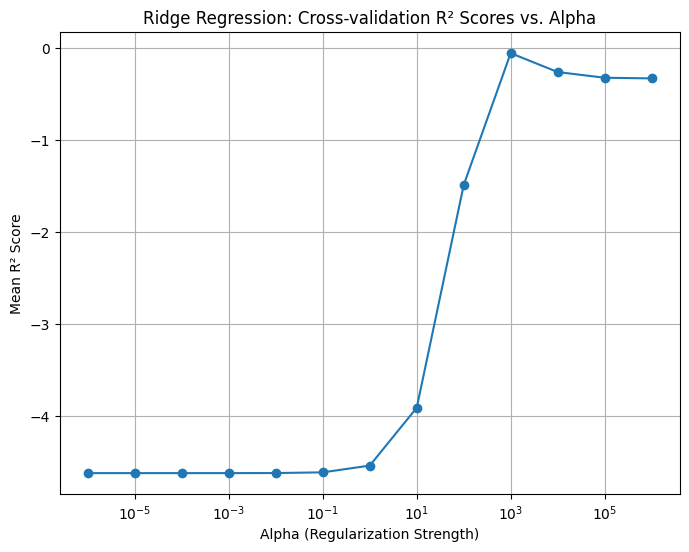

Best alpha: 1000.0
Test set R² score: 0.11696657402993182


In [ ]:
from sklearn.linear_model import Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge regression model
ridge = Ridge()

# Perform cross-validation to select the optimal alpha (regularization strength)
alphas = np.logspace(-6, 6, 13)  # Explore a range of alpha values (log scale)
cv_scores = []

for alpha in alphas:
    ridge.alpha = alpha  # Set the alpha value
    score = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')  # R² as scoring
    cv_scores.append(np.mean(score))  # Store the average R² score

# Plot the cross-validation results to find the best alpha
plt.figure(figsize=(8, 6))
plt.plot(alphas, cv_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean R² Score')
plt.title('Ridge Regression: Cross-validation R² Scores vs. Alpha')
plt.grid(True)
plt.show()

# Find the best alpha (maximum R² score)
best_alpha = alphas[np.argmax(cv_scores)]
print(f"Best alpha: {best_alpha}")

# Fit the model using the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_r2_score = ridge_best.score(X_test_scaled, y_test)
print(f"Test set R² score: {test_r2_score}")

## Class work 23-07-2025


### R code

In [ ]:
Reg_fun <-function(x){
   5*sin(x)+23*cos(x)^2
}

In [ ]:
set.seed(475)

In [ ]:
X <- runif(100,5,15)
Y <- Reg_fun(X)+rnorm(100,0,5)

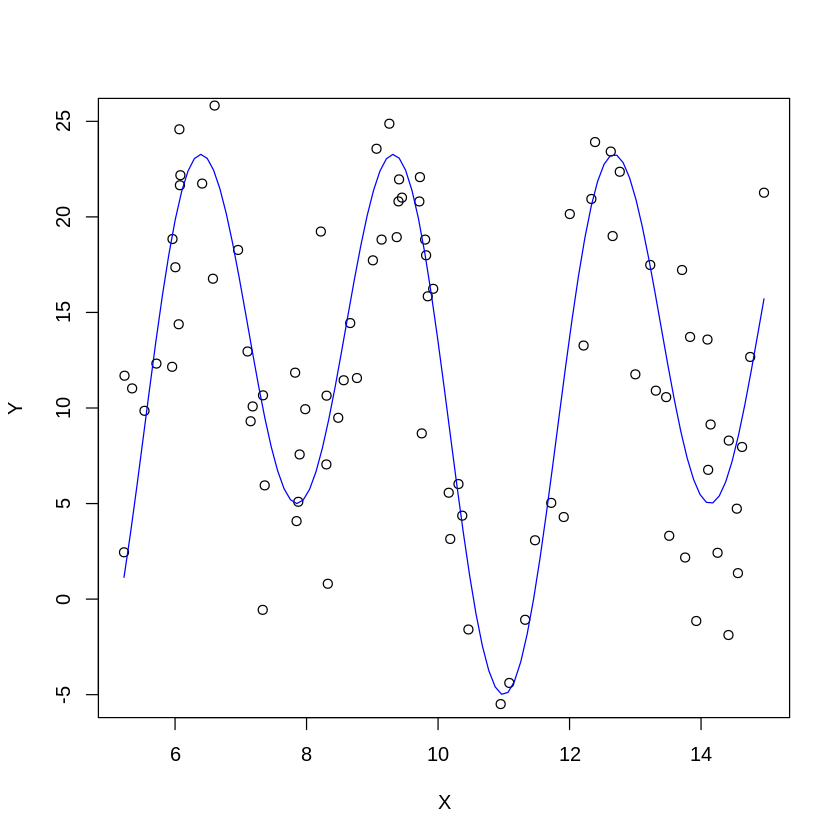

In [ ]:
plot(X,Y,ylim=c(-5,25))
curve(Reg_fun,add=TRUE,col="blue")

In [ ]:
lm_cube <- lm(Y~X+I(X^2)+I(X^3))
summary(lm_cube)


Call:
lm(formula = Y ~ X + I(X^2) + I(X^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5920  -6.4520  -0.4826   7.4601  19.4650 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -16.71267   50.01708  -0.334    0.739
X            11.00026   16.32431   0.674    0.502
I(X^2)       -1.19273    1.69676  -0.703    0.484
I(X^3)        0.03869    0.05634   0.687    0.494

Residual standard error: 9.616 on 96 degrees of freedom
Multiple R-squared:  0.04465,	Adjusted R-squared:  0.0148 
F-statistic: 1.496 on 3 and 96 DF,  p-value: 0.2206


In [ ]:
lm_poly_cube <- lm(Y~poly(X,degree=3,raw=TRUE))
summary(lm_poly_cube)


Call:
lm(formula = Y ~ poly(X, degree = 3, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5920  -6.4520  -0.4826   7.4601  19.4650 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)
(Intercept)                      -16.71267   50.01708  -0.334    0.739
poly(X, degree = 3, raw = TRUE)1  11.00026   16.32431   0.674    0.502
poly(X, degree = 3, raw = TRUE)2  -1.19273    1.69676  -0.703    0.484
poly(X, degree = 3, raw = TRUE)3   0.03869    0.05634   0.687    0.494

Residual standard error: 9.616 on 96 degrees of freedom
Multiple R-squared:  0.04465,	Adjusted R-squared:  0.0148 
F-statistic: 1.496 on 3 and 96 DF,  p-value: 0.2206


In [ ]:
rm(list=ls())

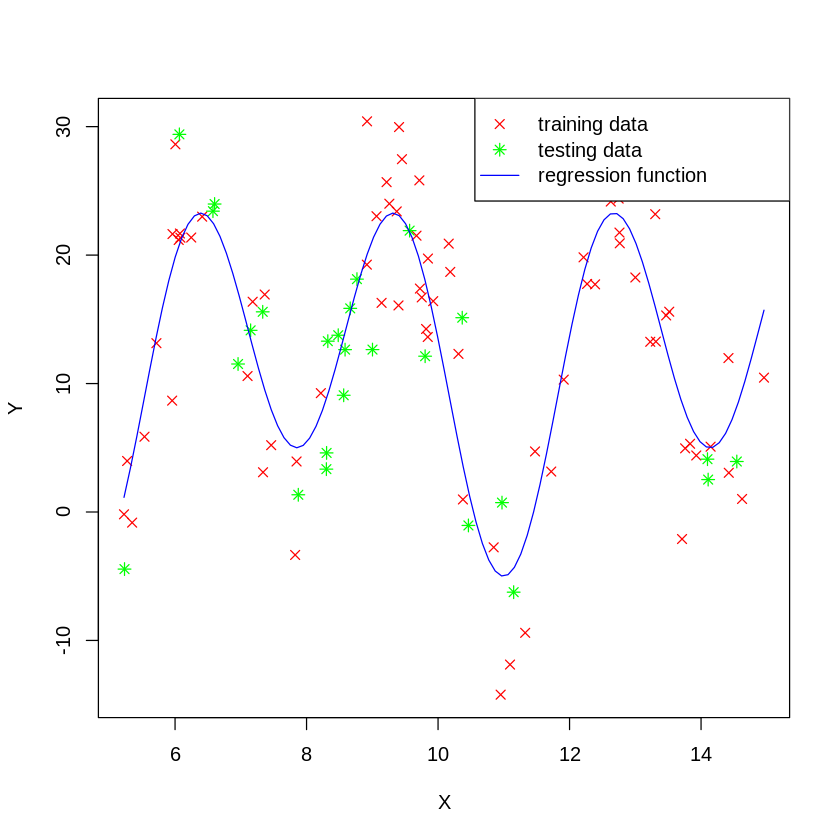

In [ ]:

set.seed(475) #set your roll number as the seed.

#defining the regression function
Reg_fun <-function(x){
   5*sin(x)+23*cos(x)^2
}
#Generating the simulated dataset

X <- runif(100,5,15)
Y <- Reg_fun(X)+rnorm(100,0,5)

#70-30 Train-Test split

sample <- sample(c(TRUE, FALSE), length(X), replace=TRUE, prob=c(0.7,0.3))
X.train  <- X[sample]
X.test   <- X[!sample]
Y.train <- Y[sample]
Y.test <- Y[!sample]
Train.set <- data.frame(X=X.train,Y=Y.train)
#Test.set <- data.frame(X=X.test,Y=Y.test)
#ploting the dataset

plot(X.train,Y.train,pch=4,col="red",xlab="X",ylab="Y")
points(X.test,Y.test,pch=8,col="green")
curve(Reg_fun,col="blue",add=TRUE)
legend("topright",c("training data","testing data","regression function"),lty=c(0,0,1),pch=c(4,8,NA),col=c("red","green","blue"))

Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.test)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.test)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.test)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from 

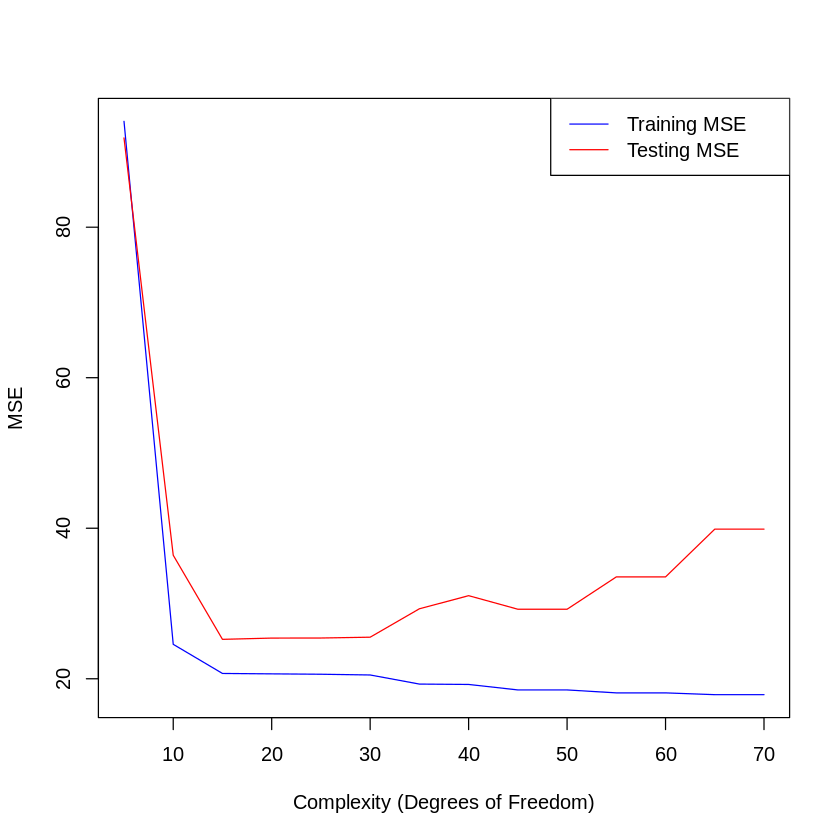

In [ ]:

#fixing the possible degrees of the polynomials
deg_val <- seq(5,70,by=5)

#initialising
mse.train <- c()
mse.test  <- c()

#Trainin and testing MSE
for(l in deg_val){
  # Fit model on training set using raw polynomials
  lm.pol <- lm(Y ~ poly(X, degree = l, raw = TRUE), data = Train.set)

  # Predict on training and test sets
  tr.pr <- predict(lm.pol, newdata = data.frame(X = X.train))
  te.pr <- predict(lm.pol, newdata = data.frame(X = X.test))

  #calculating training and testing MSE
  mse.tr <- mean((Y.train-tr.pr)^2)
  mse.te <- mean((Y.test-te.pr)^2)
  print
  # Store the MSEs.
  mse.train <- c(mse.train,mse.tr)
  mse.test <- c(mse.test, mse.te)
}
plot(deg_val,mse.train,type="l",col="blue",xlab="Complexity (Degrees of Freedom)",ylab="MSE")
lines(deg_val,mse.test,type="l",col="red")
legend("topright",c("Training MSE","Testing MSE"),lty=1,col=c("blue","red"))


In [ ]:
rm(list=ls())

In [ ]:
Reg_fun <-function(x){
   5*sin(x)+23*cos(x)^2
}
seed <- 475 #set your roll number
deg_val <- seq(5,70,by=5)
X.test <- runif(50,5,15)
Y.test <- Reg_fun(X.test)+rnorm(50,0,5)
Test.set <- data.frame(X=X.test,Y=Y.test)
Train.MSE <-c()
Test.MSE <- c()
Test.at.12 <- c()
for(i in 1:50){
  set.seed(seed+(i-1)*40)
  X.train <- runif(200,5,15)
  Y.train <- Reg_fun(X.train)+rnorm(200,0,5)
  Train.set <- data.frame(X=X.train,Y=Y.train)

  #initialising
  mse.train <- c()
  mse.test  <- c()
  test.12 <- c()
  #Trainin and testing MSE
  for(l in deg_val){
    # Fit model on training set using raw polynomials
    lm.pol <- lm(Y ~ poly(X, degree = l, raw = TRUE), data = Train.set)

    suppressWarnings({
    # Predict on training and test sets
    tr.pr <- predict(lm.pol, newdata = data.frame(X = X.train))
    te.pr <- predict(lm.pol, newdata = data.frame(X = X.test))
    te.pr.12 <- predict(lm.pol, newdata = data.frame(X = 12))
    })
    #calculating training and testing MSE
    mse.tr <- mean((Y.train-tr.pr)^2)
    mse.te <- mean((Y.test-te.pr)^2)

    # Store the MSEs.
    mse.train <- c(mse.train,mse.tr)
    mse.test <- c(mse.test, mse.te)
    test.12 <- c(test.12,te.pr.12)
  }
  Train.MSE <-rbind(Train.MSE,mse.train)
  Test.MSE <- rbind(Test.MSE,mse.test)
  Test.at.12 <- rbind(Test.at.12,test.12)
}
colnames(Train.MSE)=paste("deg",deg_val,sep="=")
colnames(Test.MSE)=paste("deg",deg_val,sep="=")
colnames(Test.at.12)=paste("deg",deg_val,sep="=")

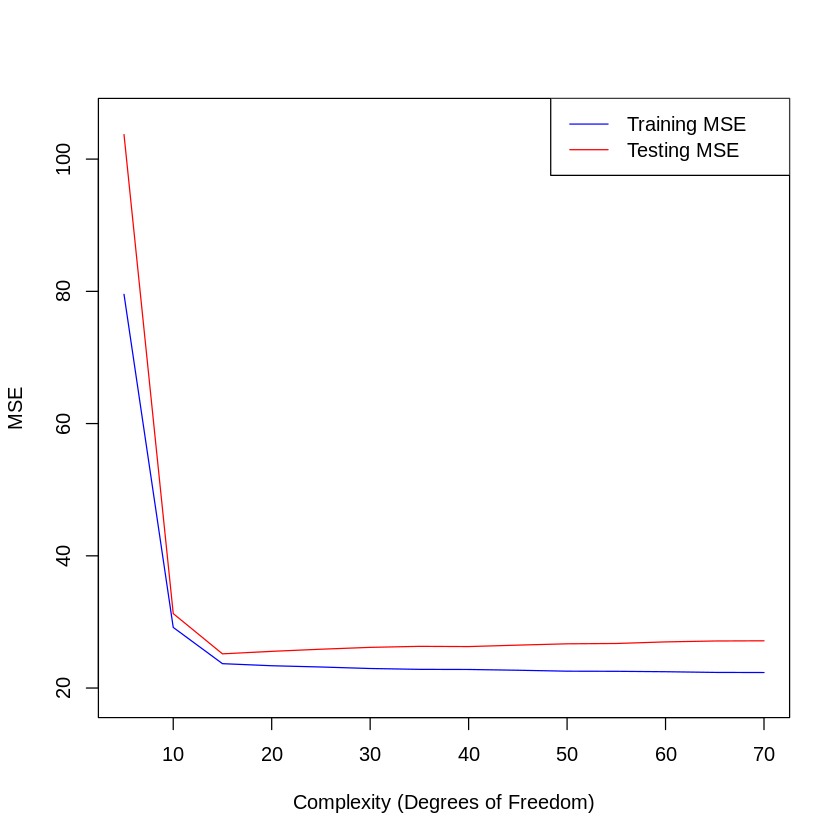

In [ ]:
Train.mse.av <- apply(Train.MSE,2,mean)
Test.mse.av <- apply(Test.MSE,2,mean)
plot(deg_val,Test.mse.av,type="l",col="red",xlab="Complexity (Degrees of Freedom)",ylab="MSE",ylim=c(19,max(c(Train.mse.av,Test.mse.av))+2))
lines(deg_val,Train.mse.av,type="l",col="blue")
legend("topright",c("Training MSE","Testing MSE"),lty=1,col=c("blue","red"))


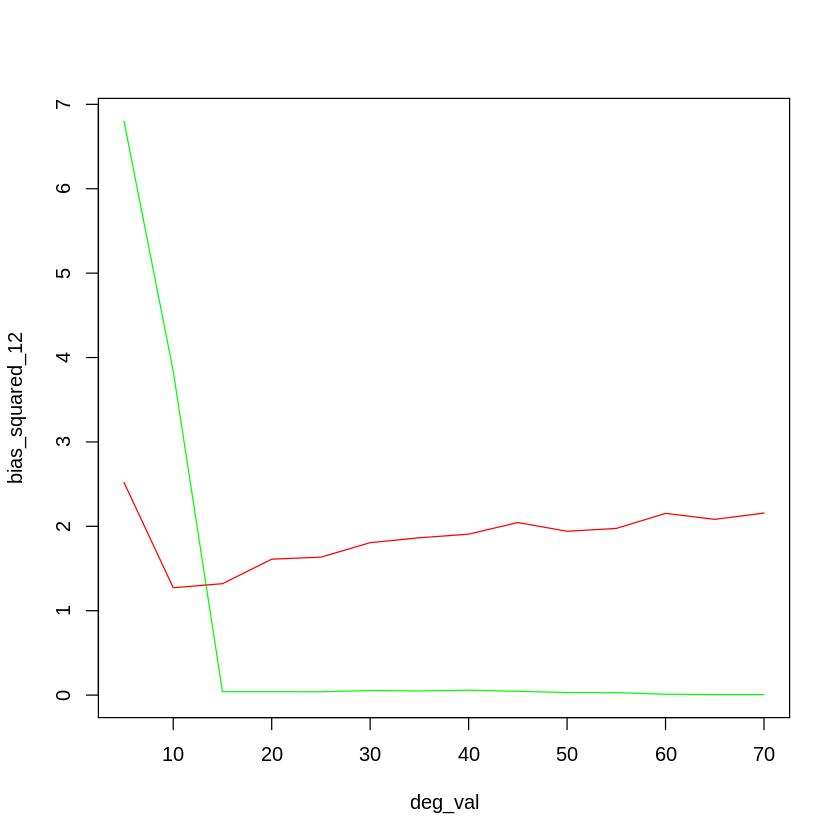

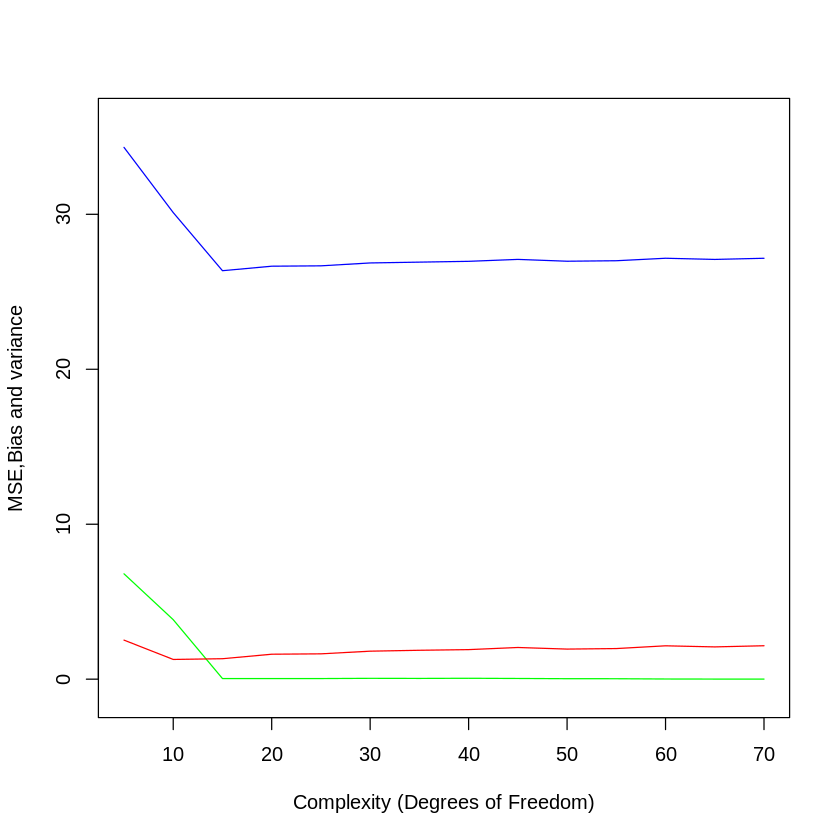

In [ ]:
val.12 <- Reg_fun(12)
mean.12 <- apply(Test.at.12,2,mean)
var.12 <- apply(Test.at.12,2,var)
bias_squared_12 <- (mean.12-val.12)^2
mse.12 <- var.12+bias_squared_12+5^2

plot(deg_val,bias_squared_12,type="l",col="green")
lines(deg_val,var.12,type="l",col="red")

plot(deg_val,bias_squared_12,type="l",col="green",ylim=c(-1,36),xlab="Complexity (Degrees of Freedom)",ylab="MSE,Bias and variance")
lines(deg_val,var.12,type="l",col="red")
lines(deg_val,mse.12,type="l",col="blue")

In [ ]:
Test.at.12

,deg=5,deg=10,deg=15,deg=20,deg=25,deg=30,deg=35,deg=40,deg=45,deg=50,deg=55,deg=60,deg=65,deg=70
test.12,10.049538,9.933530,10.90770,11.00544,11.74586,12.03209,12.07045,12.07045,11.835174,12.147106,12.147106,11.582110,11.72626,11.72626
test.12,12.521941,13.392614,15.13876,16.58849,16.41593,16.46390,16.46390,16.65261,17.141347,17.138904,17.138904,17.241961,17.24196,17.35000
test.12,10.981369,13.103782,14.95867,16.23415,16.28885,15.87371,16.07853,16.07853,15.453867,15.564171,15.564171,15.879899,15.61848,15.61848
test.12,12.507740,12.754757,14.47022,14.33862,14.68616,14.71441,14.64549,14.64549,15.090512,14.878095,14.878095,14.632466,14.51819,14.51819
test.12,10.841693,12.814122,14.24000,14.12558,14.29854,14.48334,14.51470,14.51470,14.557194,14.630010,14.799503,14.799503,14.63747,14.63747
test.12,11.058310,10.502252,12.32835,12.73467,12.38231,11.48107,11.53732,11.53732,12.243985,12.237895,12.237895,12.057711,12.41659,12.41659
test.12,9.187865,11.338163,13.67680,14.44974,14.20246,14.35235,14.51175,14.51175,13.866529,13.713608,13.713608,13.572368,13.43121,13.43121
test.12,10.408817,11.160212,12.93248,13.21986,13.59993,13.97894,13.81560,13.81560,13.356334,13.051745,13.051745,13.210482,13.20116,13.20116
test.12,8.852507,9.742125,12.40110,12.89795,13.42926,13.43940,13.44959,13.44959,13.242971,13.242533,13.242533,13.259586,13.33946,13.33946
test.12,13.408522,12.690907,13.82378,13.62462,13.72000,14.10729,13.89718,13.89718,14.124960,14.012278,14.012278,13.891468,13.78243,13.78243


## Problem set 2 (Boston)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
sns.set_style('whitegrid')

In [11]:
boston= fetch_openml(name = "boston", version =1, as_frame =True)
Y=boston.frame["MEDV"].values
X=boston.frame["LSTAT"].values

In [12]:
batch_size= 22
X_batches = np.array_split(X, len(X) // batch_size)
Y_batches= np.array_split(Y, len(Y)//batch_size)

In [13]:
class StepFunction:
    def __init__(self, x, y):
        """
        Initialize with breakpoints `x` and values `y`.
        `x` should have length k+1 and `y` should have length k.
        """
        if len(y) != len(x) - 1:
            raise ValueError("Length of y must be one less than length of x")
        self.x = x
        self.y = y

    def predict(self, z):
        # Predict step function value at z (scalar or array).
        z = np.asarray(z)
        result = np.zeros_like(z, dtype=float)
        for i in range(len(self.y)):
            result[(z >= self.x[i]) & (z < self.x[i + 1])] = self.y[i]
        return result

In [14]:
def Bin_smoothing(k, X, Y,i):
    # Choose which batch to use for testing (e.g., the 5th batch, index 4)
    test_batch_index = i

# --- Isolate the test data ---
    x_test = X_batches[test_batch_index]
    y_test = Y_batches[test_batch_index]

# --- Isolate and combine the training data ---
# Create a list of training batches by excluding the test batch
    X_train_list = [batch for i, batch in enumerate(X_batches) if i != test_batch_index]
    Y_train_list = [batch for i, batch in enumerate(Y_batches) if i != test_batch_index]

# Combine the list of training batches into a single NumPy array
    x_train = np.concatenate(X_train_list)
    y_train = np.concatenate(Y_train_list)

    # Bin edges
    BI = np.linspace(5, 15, k + 1)
    Means = []

    for j in range(k):
        indices = np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]
        m = np.mean(y_train[indices]) if len(indices) > 0 else 0
        Means.append(m)

    sf = StepFunction(BI, Means)

    # Compute test and train errors
    err_Train = np.mean((y_train - sf.predict(x_train))**2)
    err_Test = np.mean((y_test - sf.predict(x_test))**2)

    return err_Train, err_Test

In [15]:
# For several values of k we will compute avg training and test error
K = [5,10,15,20,25,30,35,40,45,50]
Res = []
R = len(X_batches) # Repeat the procedure 50 times

for r in range(R):
    np.random.seed(r)
    # Simulating different data sets over different replication
    X = X_batches
    Y = X_batches

    errs = []
    # compute the errors for different number of bins
    for k in K:
        a,b = Bin_smoothing(k=k, X=X, Y=Y,i=r)
        errs.append([a,b])

    Res.append(errs)
# making a data frame of the results
Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='k', value=K)
Res_df

,k,Avg Train error,Avg Test error
0,5,273.868297,274.863047
1,10,273.264997,274.907401
2,15,272.897948,274.966577
3,20,272.708290,275.207727
4,25,272.033886,274.938816
5,30,271.816379,275.275167
6,35,271.853428,275.958680
7,40,271.897372,276.348421
8,45,271.223867,276.962902
9,50,270.845789,276.319461


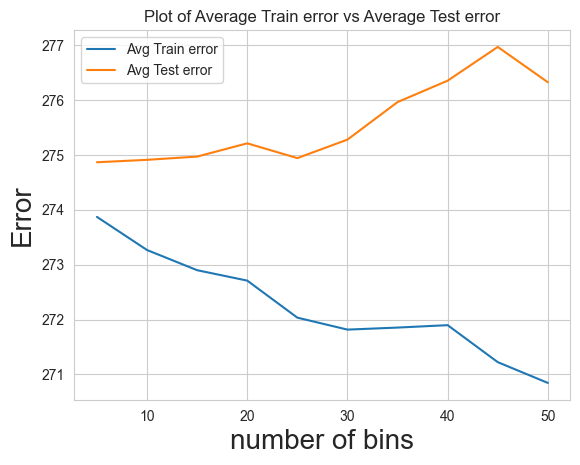

In [16]:
plt.plot(Res_df['k'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['k'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('number of bins', fontsize=20); plt.ylabel('Error', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()